In [5]:
import numpy as np
import matplotlib.pyplot as plt


class LinearRegression():
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0
        self.X = None
        self.y = None
        self.y_pred = None
        self.sse = 0
        self.mse = 0
        self.rmse = 0
        self.mae = 0
        self.ssr = 0
        self.sst = 0
        self.r2 = 0

    def input_data(self, x, y):
        self.X = np.array(x)
        self.y = np.array(y)

    def solve(self):
        x = self.X
        y = self.y
        self.coef_ = sum((x - x.mean()) * (y - y.mean())) / sum((x - x.mean())**2)
        self.intercept_ = y.mean() - self.coef_ * x.mean()
        self.y_pred = np.array(x * self.coef_ + self.intercept_)

    def predict(self, x_new):
        return self.coef_ * x_new + self.intercept_

    def plot(self):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.X, self.y, marker='+', color='green')
        plt.plot(self.X, self.y_pred, '-r')
        plt.text(1, 7.9, 'a:  {0:.2f}'.format(self.coef_), weight='bold', color='black', fontsize=16)
        plt.text(1, 7.7, 'b:  {0:.2f}'.format(self.intercept_), weight='bold', color='black', fontsize=16)
        plt.text(1, 7.5, 'R2: {0:.2f}'.format(self.r2), weight='bold', color='black', fontsize=16)
        plt.text(1, 7.3, 'MSE:  {0:.2f}'.format(self.mse), weight='bold', color='black', fontsize=16)
        plt.show()

    def evaluate(self):
        self.sse = sum((self.y - self.y_pred) ** 2)
        self.mse = sum((self.y - self.y_pred) ** 2) / len(self.X)
        self.rmse = np.sqrt(self.mse)
        self.mae = np.mean(np.abs(self.y - self.y_pred))




当X = 10时，y = 9.5


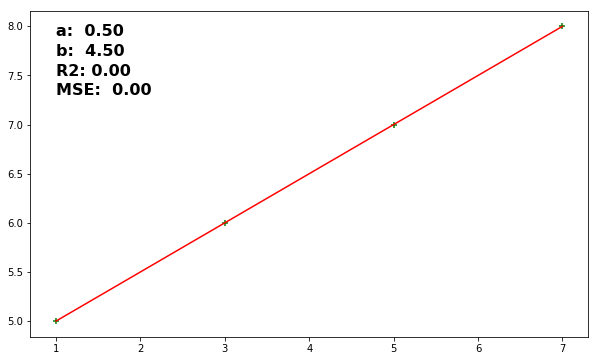

In [9]:
# 训练数据
X = np.array([1, 3, 5, 7])
y = np.array([5, 6, 7, 8])

# 创建模型
lr = LinearRegression()
lr.input_data(X, y)

# 求解
lr.solve()
lr.evaluate()

# 预测
x = 10
print('当X = 10时，y =', lr.predict(x))

# 画图
lr.plot()

coefficients:  [938.23786125]
intercept:  152.91886182616167
Mean squared error:  2548.0723987259703
Variance score:  0.47257544798227136


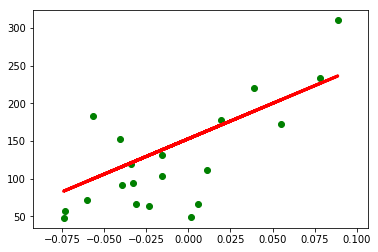

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 导入糖尿病数据
diabetes = datasets.load_diabetes()

# 仅使用第三个特征
# sklearn接受的输入中，特征集是2维数据，
# 所以我们要增加一个维度，将长度为n的一维向量，变成n*1的二维向量
X = diabetes.data.copy()[:, np.newaxis, 2]
y = diabetes.target.copy()

# 将数据分为训练集和测试集
X_train = X[:-20]
X_test = X[-20:]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]
# sklearn提供了分割训练集与测试集的方法，不过这次为了让大家得到一致的结果，
# 我们直接取最后20个样本作为测试集（我们也可以设置train_test_split方法中
# 的random_state参数，用来保证每次实验的训练集和测试集是一致的。）
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# 创建线性回归模型对象
reg = linear_model.LinearRegression(fit_intercept=True)

# 训练模型
reg.fit(X_train, y_train)

# 预测测试数据
y_pred = reg.predict(X_test)

# 打印系数
print('coefficients: ', reg.coef_)
print('intercept: ', reg.intercept_)

# 打印均方误差
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

# 打印R2分数
print('Variance score: ', r2_score(y_test, y_pred))

# 画图
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, '-r', linewidth=3)
plt.show()